<a href="https://colab.research.google.com/github/crdguez/aprendiendo_sympy/blob/master/geometria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Si usas [https://colab.research.google.com/](https://colab.research.google.com/), necesitarás instalar los siguientes paquetes si quieres usar la función *parse_latex* que sirve para introducir expresiones directamente en $ \LaTeX $:

In [1]:
# Descomentar si se quiere usar:
# !pip install sympy==1.3 antlr4-python3-runtime

Lo primero que necesitamos hacer es importar la librerias de *Python* que necesitaremos

In [2]:
from sympy import *
from IPython.display import Markdown as md
from IPython.display import display
from sympy import solve_poly_inequality, reduce_abs_inequality
from sympy.solvers.inequalities import solve_univariate_inequality, reduce_rational_inequalities
from sympy.parsing.latex import parse_latex

from sympy.vector import CoordSys3D, vector

import numpy as np


from __future__ import division
from sympy import *
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)
#init_printing(use_latex=False)

## Usando el módulo Geometry

In [3]:
from sympy.geometry import Point, Line

### Vectores como puntos

Los vectores se definen como Puntos.

**Ejemplo:** el vector $\overrightarrow{v}=(1,2)$

In [6]:
v = Point(1,2)

* Coordenadas

In [9]:
v.args

(1, 2)

* Giros

In [10]:
v.rotate(pi)

Point2D(-1, -2)

* Módulo

In [11]:
v.distance(Point(0,0))

sqrt(5)

### Rectas

Para crear rectas necesitamos dos puntos, o un punto y una pendiente:

**Ejemplo:** Recta que pasa por *A(1,3)* y *B(2,4)*

In [19]:
lista = [(1,3),(2,4)]
A, B = [Point(l) for l in lista]
r = Line(A,B)
pprint(Eq(r.equation(),0))

-x + y - 2 = 0


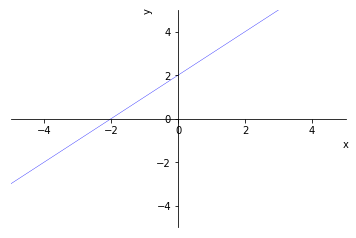

In [23]:
from sympy.plotting import plot_implicit

p1 = plot_implicit(r.equation())


* Pero también podemos indicar la pendiente con el argumeto *slope*

In [34]:
m = r.slope

s = Line(A,slope=m)
pprint(Eq(s.equation(),0))

-x + y - 2 = 0


In [36]:
s.direction

Point2D(1, 1)

### (Avanzado) Función para importar rectas desde $\LaTeX$

El siguiente código permite manejar ecuaciones de recta en código LaTeX

In [42]:
from sympy.parsing.latex import parse_latex

def Linea(expr) :
    eq = eval(str(parse_latex(expr)))
    p1 = Point(0,nsimplify(solve(Eq(eq.args[0].subs(x,0),eq.args[1].subs(x,0)),y)[0]))
    p2 = Point(1,nsimplify(solve(Eq(eq.args[0].subs(x,1),eq.args[1].subs(x,1)),y)[0]))
    
    return Line(p1,p2)

r=Linea(r'3x+2y+8=0')
pprint(r.equation())

3⋅x        
─── + y + 4
 2         


## Usando el modulo Vector

Podemos usar el módulo *Vector*. Es un poco más complicado de usar porque hay que genera un sistemar de coordenadas, pero es más potente.

Para generar el sistema de coordenadas:

In [4]:
N = CoordSys3D('N') #instanciamos un sistema de coordenadas en R3

i, j, k = N.base_vectors()

display(N.base_vectors())


(N.i, N.j, N.k)

Vamos a generar el vector $\overrightarrow{v}=(1,2)$. Como el módulo *vector* trabaja en 3 dimesiones, debemos pasar las 3 componentes:

In [5]:
v = [1,2,0]
base = [i,j,k]
u=(np.array(v)*np.array(base)).sum()
type(u)
u.components
u

N.i + 2*N.j

Podíamos haber obtenido lo mismo directamente:

In [6]:
i+2*j

N.i + 2*N.j

### Operaciones con vectores

#### Suma, producto por un número y combinaciones lineales

Se operan con los operadores habituales, solo hay que tener encuenta que los operando tienen que ser vectores. 
Dados los vectores $\overrightarrow{u}=(1,3)$ y $\overrightarrow{v}=(-3,5)$, y $m=3$ y $n=-2$

In [7]:
u=i+3*j
v=-3*i+5*j
m=3
n=-2

 *  $\overrightarrow{u}+\overrightarrow{v}$

In [8]:
u+v

(-2)*N.i + 8*N.j

 *  $\overrightarrow{u}-v\overrightarrow{v}$

 *  $\overrightarrow{u}+\overrightarrow{v}$

In [9]:
u-v

4*N.i + (-2)*N.j

 *  $m\cdot\overrightarrow{u}$

In [10]:
m*u

3*N.i + 9*N.j

 *  $m\cdot\overrightarrow{u}+n\cdot\overrightarrow{v}$

In [11]:
m*u+n*v

9*N.i + (-1)*N.j

#### Módulo

* $|u|$

In [75]:
u.magnitude()

### Producto escalar



## Referencias


 *   [Documentación de SymPy](https://docs.sympy.org/latest/index.html#)


In [12]:
!jupyter nbconvert geometria.ipynb --to=markdown

[NbConvertApp] Converting notebook geometria.ipynb to markdown
[NbConvertApp] Writing 3983 bytes to geometria.md
